In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ANÁLISIS GENERAL DE EVALUACIÓN

In [5]:
ruta = r"C:\Users\9 ----- SIG\Documents\EVALUACION DOCENTE\COMITÉ\COMITE_EVALUACION.xlsx"
df_comite = pd.read_excel(ruta) 
df_comite.head(3)

,CODIGO,NOMBRE,SEDE,PROGRAMA,NIVEL_FORMACION,ESTADO_A_CONTRATAR,ESTUDIANTES_MATRICULADOS,ESTUDAINTES_PARTICIPACION,PROM_ARITMETICO_ESTUDIANTE,PROM_PONDERADO_ESTUDIANTE,PROM_AUTO_EVAL,OBSERVACION
0,100631,HUMBERTO FERREIRA ARQUEZ,CÚCUTA,ODONTOLOGIA (PRES),MAESTRÍA,CONTINÚA SIN NOVEDAD,20,8,4.99,4.98,5.0,NaN
1,101406,JHON EDUARDO GARCIA VARGAS,RIOHACHA,MATEMATICAS - FAC CIENCIAS,MAESTRÍA,CONTINÚA SIN NOVEDAD,32,30,4.92,4.92,5.0,NaN
2,101761,ANDREINA JOHANA BERMUDEZ PACHECO,CARTAGO,PSICOLOGIA (DISTANCIA),MAESTRÍA,CONTINÚA SIN NOVEDAD,24,17,4.83,4.72,5.0,NaN


In [52]:
print(f"Hay {len(df_comite)} docentes a evaluar")

Hay 1357 docentes a evaluar


In [18]:
# RESUMEN GENERAL

resumen = df_comite.groupby("ESTADO_A_CONTRATAR")["ESTADO_A_CONTRATAR"].count().sort_values(ascending = False)
resumen_pct = round(resumen / len(df_comite) * 100,2)
resumen_pct

ESTADO_A_CONTRATAR
CONTINÚA SIN NOVEDAD                            94.84
CONTINÚA CON SEGUIMIENTO                         2.73
NO APRUEBA EVALUACIÓN                            2.36
NO CONTINÚA RETIRO POR DECISIÓN DEL PROFESOR     0.07
Name: ESTADO_A_CONTRATAR, dtype: float64

In [ ]:
# RESUMEN GENERAL GRÁFICO

resumen = df_comite.groupby("ESTADO_A_CONTRATAR")["ESTADO_A_CONTRATAR"].count().sort_values(ascending = False)
resumen_pct = round(resumen / len(df_comite) * 100,2)

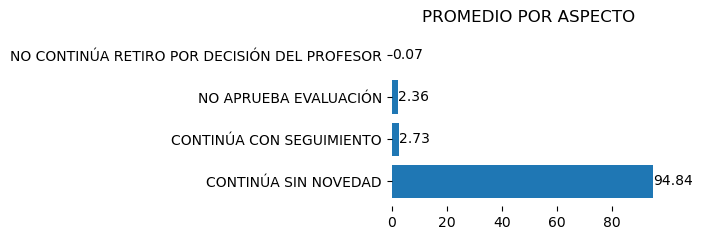

In [35]:
# GRAFICO PROMEDIO POR ASPECTO

fig, ax = plt.subplots(figsize=(7, 2.5))
bars = ax.barh(resumen_pct.index, resumen_pct.values)
# Agregar etiquetas en las barras
for i, v in enumerate(resumen_pct.values):
    ax.text(v + 0.03, i, f'{v:.2f}', va='center')
plt.title("PROMEDIO POR ASPECTO")
plt.tight_layout()
# quiatr los bordes
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False);

In [37]:
docentes_foco = sum(resumen_pct.values[1:4])
print(F"El porcentaje de docentes foco es de {docentes_foco}%, esto corresponde a aquellos docentes que no están dentro de 'CONTINUA SIN NOVEDAD'")

El porcentaje de docentes foco es de 5.16%, esto corresponde a aquellos docentes que no están dentro de 'CONTINUA SIN NOVEDAD'


In [58]:
# MEDIDAS DE TENDENCIA CENTRAL 

columnas = [
    "PROM_ARITMETICO_ESTUDIANTE",
    "PROM_PONDERADO_ESTUDIANTE",
    "PROM_AUTO_EVAL"
]

descriptiva = df_comite[columnas].agg(["mean", "std", "median", "min", "max"]).round(2)
descriptiva

,PROM_ARITMETICO_ESTUDIANTE,PROM_PONDERADO_ESTUDIANTE,PROM_AUTO_EVAL
mean,4.51,4.49,4.39
std,0.81,0.81,1.43
median,4.69,4.66,4.90
min,-1.00,-1.00,0.00
max,5.00,5.00,5.00


In [49]:
df_sin_calificacion = df_comite[df_comite["PROM_ARITMETICO_ESTUDIANTE"] == -1]
cantidad_sin_califica = len(df_sin_calificacion)
print(f"Hay {cantidad_sin_califica} docentes que presentan promedio de -1, es decir no fueron calificados por los estudiantes")
print(f"De estos {cantidad_sin_califica} docentes, el 100% CONTINUA SIN NOVEDAD")

Hay 24 docentes que presentan promedio de -1, es decir no fueron calificados por los estudiantes
De estos 24 docentes, el 100% CONTINUA SIN NOVEDAD


In [51]:
# TABAL FILTRADA SIN LOS DOCENTES CON -1

df_sin_negativos = df_comite[df_comite["PROM_ARITMETICO_ESTUDIANTE"] != -1]
df_sin_negativos.head(3)

,CODIGO,NOMBRE,SEDE,PROGRAMA,NIVEL_FORMACION,ESTADO_A_CONTRATAR,ESTUDIANTES_MATRICULADOS,ESTUDAINTES_PARTICIPACION,PROM_ARITMETICO_ESTUDIANTE,PROM_PONDERADO_ESTUDIANTE,PROM_AUTO_EVAL,OBSERVACION
0,100631,HUMBERTO FERREIRA ARQUEZ,CÚCUTA,ODONTOLOGIA (PRES),MAESTRÍA,CONTINÚA SIN NOVEDAD,20,8,4.99,4.98,5.0,NaN
1,101406,JHON EDUARDO GARCIA VARGAS,RIOHACHA,MATEMATICAS - FAC CIENCIAS,MAESTRÍA,CONTINÚA SIN NOVEDAD,32,30,4.92,4.92,5.0,NaN
2,101761,ANDREINA JOHANA BERMUDEZ PACHECO,CARTAGO,PSICOLOGIA (DISTANCIA),MAESTRÍA,CONTINÚA SIN NOVEDAD,24,17,4.83,4.72,5.0,NaN


In [91]:
print(f"Quedan {len(df_sin_negativos)} docentes a evaluar {cantidad_sin_califica} menos de los {len(df_comite)} iniciales. Se sacarán del análisis para evitar sesgos en las mediciones.")

Quedan 1333 docentes a evaluar 24 menos de los 1357 iniciales. Se sacarán del análisis para evitar sesgos en las mediciones.


In [57]:
descriptiva_sin = df_sin_negativos[columnas].agg(["mean", "std", "median", "min", "max"]).round(2)
descriptiva_sin

,PROM_ARITMETICO_ESTUDIANTE,PROM_PONDERADO_ESTUDIANTE,PROM_AUTO_EVAL
mean,4.61,4.59,4.44
std,0.33,0.33,1.36
median,4.69,4.67,4.90
min,2.28,2.30,0.00
max,5.00,5.00,5.00


In [61]:
comparacion = descriptiva.join(
    descriptiva_sin, 
    lsuffix="_T", 
    rsuffix="_SN"
)

comparacion = comparacion.rename(columns={
    "PROM_ARITMETICO_ESTUDIANTE_T": "ARIT_TODOS",
    "PROM_PONDERADO_ESTUDIANTE_T": "POND_TODOS",
    "PROM_AUTO_EVAL_T": "AUTO_TODOS",
    "PROM_ARITMETICO_ESTUDIANTE_SN": "ARIT_LIMPIO",
    "PROM_PONDERADO_ESTUDIANTE_SN": "POND_LIMPIO",
    "PROM_AUTO_EVAL_SN": "AUTO_LIMPIO",
})

comparacion

,ARIT_TODOS,POND_TODOS,AUTO_TODOS,ARIT_LIMPIO,POND_LIMPIO,AUTO_LIMPIO
mean,4.51,4.49,4.39,4.61,4.59,4.44
std,0.81,0.81,1.43,0.33,0.33,1.36
median,4.69,4.66,4.90,4.69,4.67,4.90
min,-1.00,-1.00,0.00,2.28,2.30,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00


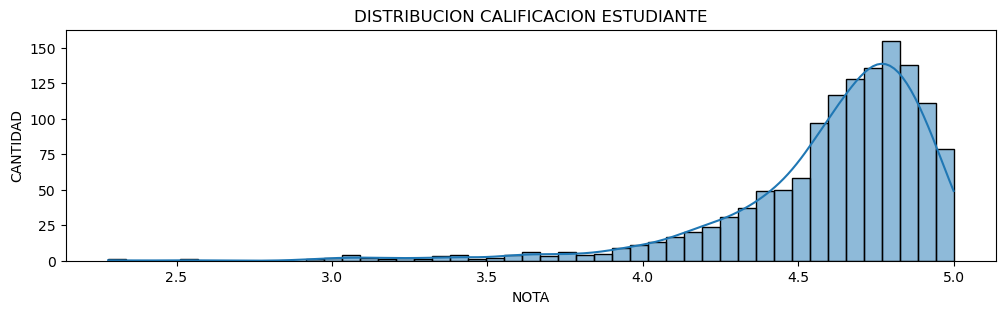

In [74]:
# GRÁFICOS DE DISTRIBUCIÓN PROMEDIO CALIFICACION ESTUDIANTE

plt.figure(figsize=(12,3))
sns.histplot(df_sin_negativos["PROM_ARITMETICO_ESTUDIANTE"], kde=True)
plt.title("DISTRIBUCION CALIFICACION ESTUDIANTE")
plt.xlabel("NOTA")
plt.ylabel("CANTIDAD");

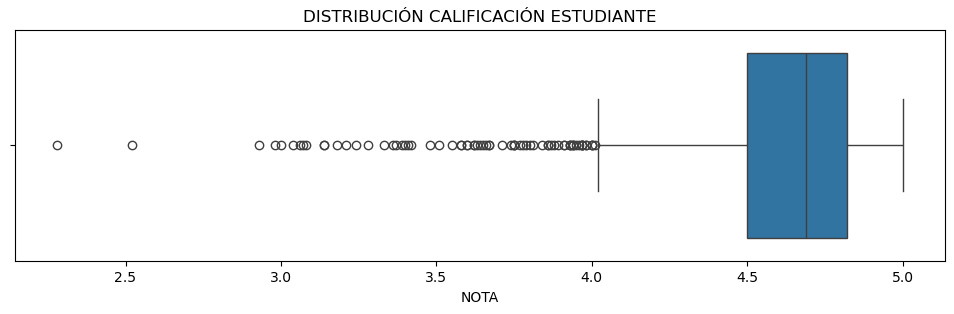

In [84]:
# GRÁFICOS DE CAJA PROMEDIO CALIFICACION ESTUDIANTE

plt.figure(figsize=(12,3))
sns.boxplot(x=df_sin_negativos["PROM_ARITMETICO_ESTUDIANTE"])
plt.title("DISTRIBUCIÓN CALIFICACIÓN ESTUDIANTE")
plt.xlabel("NOTA")
plt.ylabel("");

In [93]:
menor_a_4 = len(df_sin_negativos[df_sin_negativos["PROM_ARITMETICO_ESTUDIANTE"] < 4])
print(f"Hay {menor_a_4} profesores con calificación menor a 4")

Hay 69 profesores con calificación menor a 4


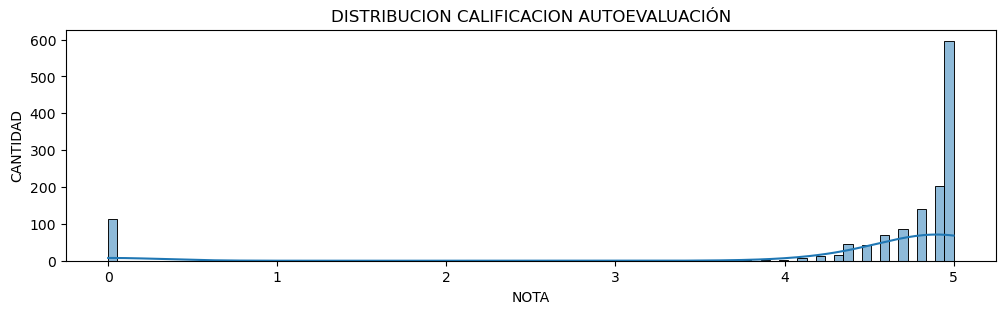

In [86]:
# GRÁFICOS DE DISTRIBUCIÓN PROMEDIO CALIFICACION AUTOEVALUACIÓN

plt.figure(figsize=(12,3))
sns.histplot(df_sin_negativos["PROM_AUTO_EVAL"], kde=True)
plt.title("DISTRIBUCION CALIFICACION AUTOEVALUACIÓN")
plt.xlabel("NOTA")
plt.ylabel("CANTIDAD");

El número 0 quiere decir que no se evaluaron

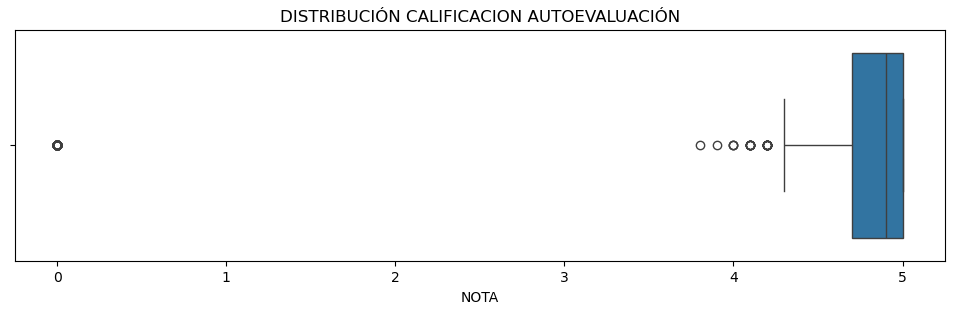

In [87]:
# GRÁFICOS DE CAJA PROMEDIO CALIFICACION AUTOEVALUACIÓN

plt.figure(figsize=(12,3))
sns.boxplot(x=df_sin_negativos["PROM_AUTO_EVAL"])
plt.title("DISTRIBUCIÓN CALIFICACION AUTOEVALUACIÓN")
plt.xlabel("NOTA")
plt.ylabel("");

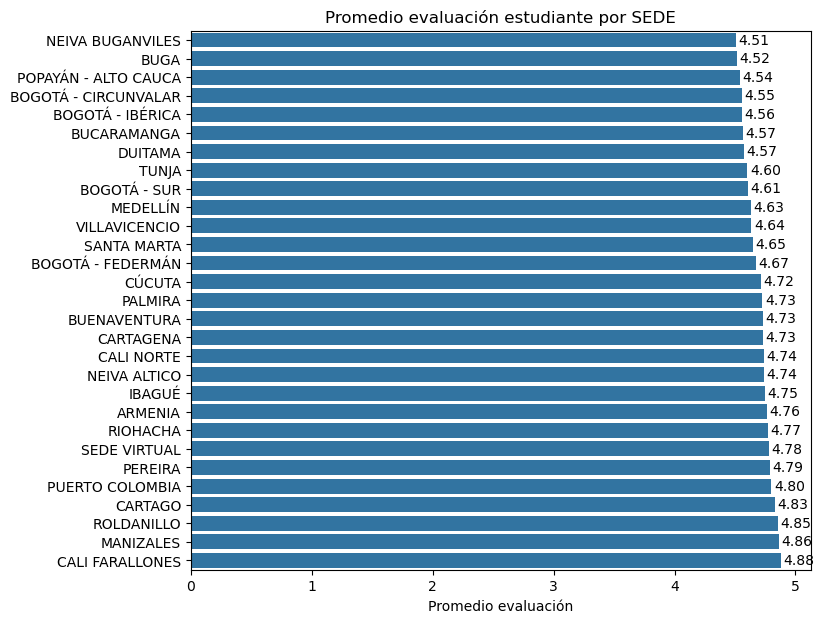

In [99]:
# ANÁLISIS POR SEDE

prom_sede = df_sin_negativos.groupby("SEDE")["PROM_ARITMETICO_ESTUDIANTE"].mean().sort_values()
plt.figure(figsize=(8,7))
sns.barplot(x=prom_sede.values, y=prom_sede.index)
plt.title("Promedio evaluación estudiante por SEDE")
plt.xlabel("Promedio evaluación")
plt.ylabel("")
# ➜ Etiquetas al final de cada barra
for i, v in enumerate(prom_sede.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center");

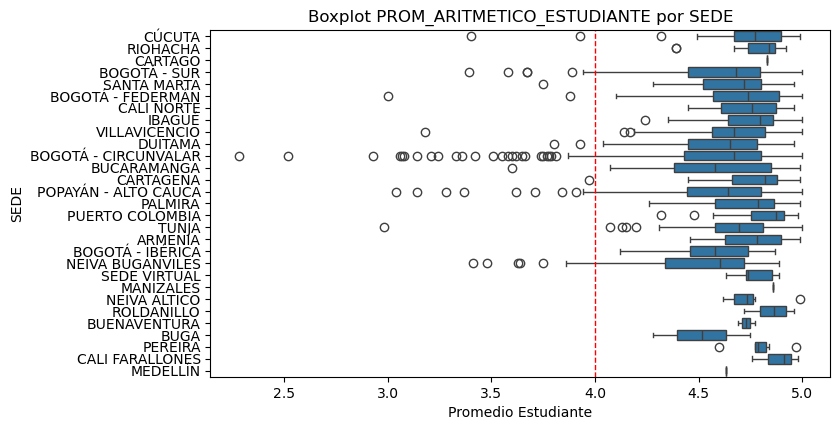

In [123]:
# BOXPLOT POR SEDE

plt.figure(figsize=(8,4.5))
sns.boxplot(
    data=df_sin_negativos,
    x="PROM_ARITMETICO_ESTUDIANTE",
    y="SEDE"
)
plt.axvline(4, color="red", linestyle="--", linewidth=1)
plt.title("Boxplot PROM_ARITMETICO_ESTUDIANTE por SEDE")
plt.xlabel("Promedio Estudiante")
plt.ylabel("SEDE");

- Caso crítico (Bogotá - Circunvalar): es la sede con los peores resultados individuales, registrando notas extremas que descienden hasta cerca de 2.2.

- Dispersión negativa: sedes como Popayán - Alto Cauca y Neiva Buganviles muestran una agrupación considerable de estudiantes con notas bajas (círculos), aunque sus promedios generales sean altos.

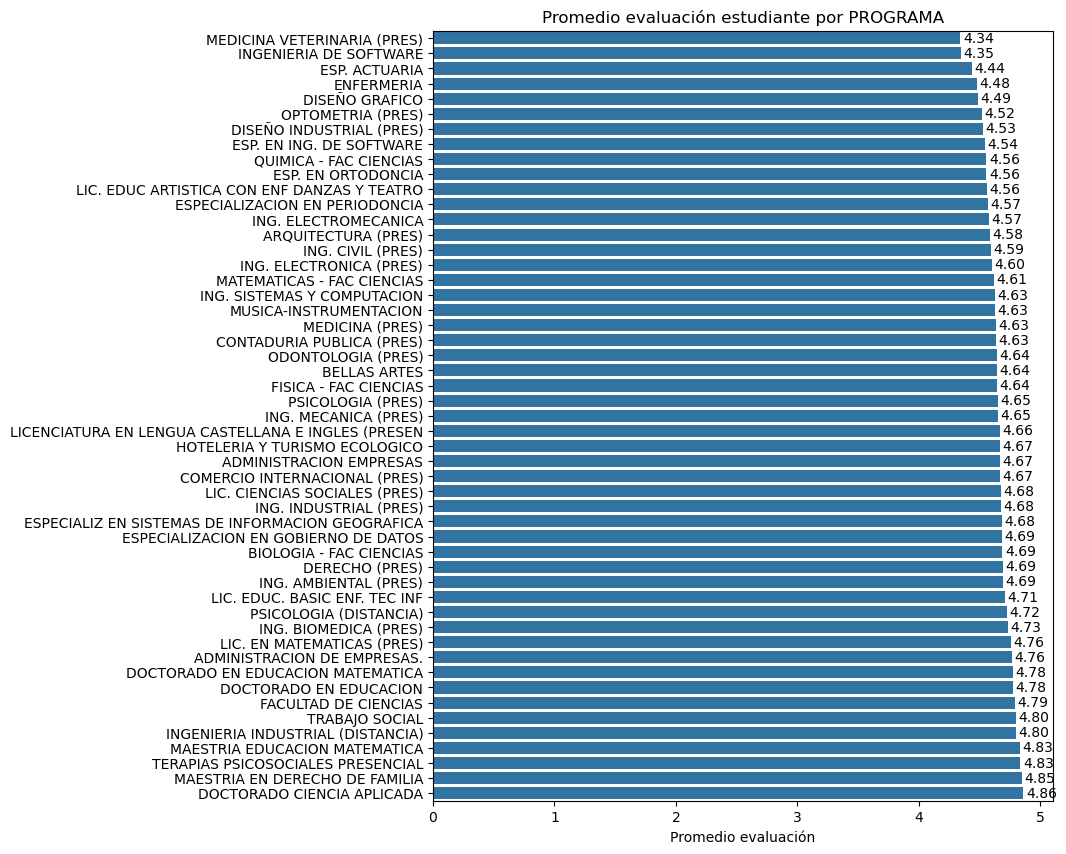

In [104]:
# ANÁLISIS POR PROGRAMA

prom_sede = df_sin_negativos.groupby("PROGRAMA")["PROM_ARITMETICO_ESTUDIANTE"].mean().sort_values()
plt.figure(figsize=(8,10))
sns.barplot(x=prom_sede.values, y=prom_sede.index)
plt.title("Promedio evaluación estudiante por PROGRAMA")
plt.xlabel("Promedio evaluación")
plt.ylabel("")
# ➜ Etiquetas al final de cada barra
for i, v in enumerate(prom_sede.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center");

Los programas: 

- Diseño gráfico.
- Enfermería.
- Especialización en actuaria.
- Ingenieria de software.
- Mediciona veterinaria (PRES)

Presentan promedio menor a 4.5 siendo el más bajo con 4.3

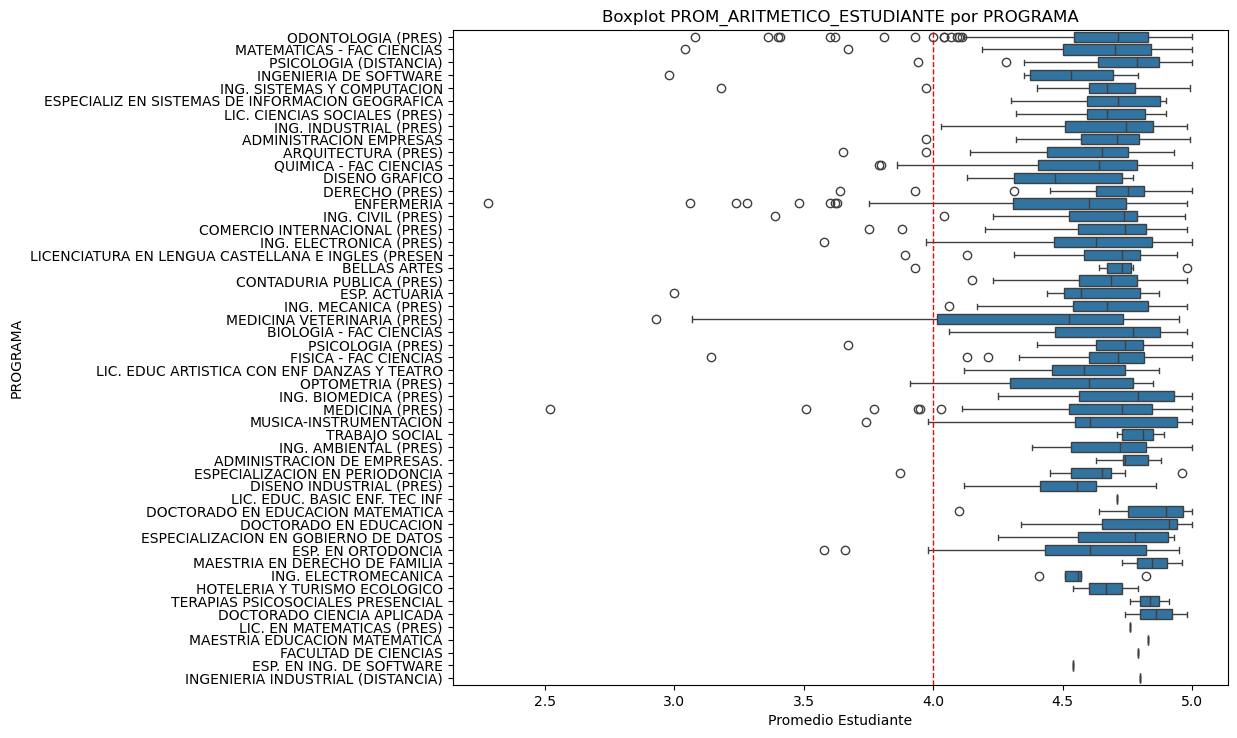

In [132]:
# BOXPLOT POR PROGRAMA

plt.figure(figsize=(10,8.5))
sns.boxplot(
    data=df_sin_negativos,
    x="PROM_ARITMETICO_ESTUDIANTE",
    y="PROGRAMA"
)
# Línea vertical en 4
plt.axvline(4, color="red", linestyle="--", linewidth=1)
plt.title("Boxplot PROM_ARITMETICO_ESTUDIANTE por PROGRAMA")
plt.xlabel("Promedio Estudiante")
plt.ylabel("PROGRAMA");

Pese a que todos los programas presentan promedios por arriba de 4, hay algunas cosas a tener en cuenta:

- Carreras del área de la salud como Enfermería, Odontología y Medicina presentan los casos más extremos hacia la baja, con notas con promedios muy inferiores a 4.0 (algunos cercanos a 2.0). "Optometría": Es uno de los pocos programas donde el "bigote" cruza claramente la línea roja hacia la izquierda. Esto indica que una parte considerable del 25% de docentes con menores notas está por debajo del umbral de 4.

- Medicina Veterinaria muestra una dispersión muy amplia hacia abajo, lo que sugiere que hay una brecha grande de rendimiento entre los docentes promedio y los de menor desempeño en esta carrera.

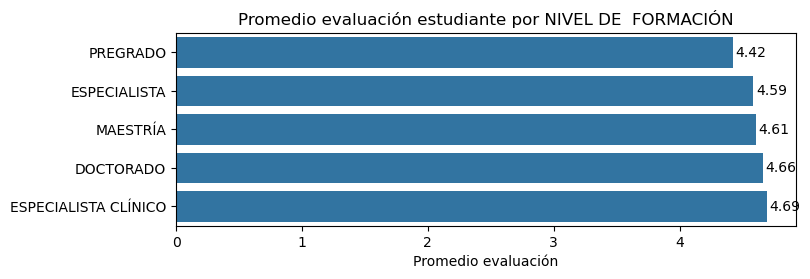

In [134]:
# ANÁLISIS POR NIVEL DE FORMACIÓN

prom_sede = df_sin_negativos.groupby("NIVEL_FORMACION")["PROM_ARITMETICO_ESTUDIANTE"].mean().sort_values()
plt.figure(figsize=(8,2.5))
sns.barplot(x=prom_sede.values, y=prom_sede.index)
plt.title("Promedio evaluación estudiante por NIVEL DE  FORMACIÓN")
plt.xlabel("Promedio evaluación")
plt.ylabel("")
# ➜ Etiquetas al final de cada barra
for i, v in enumerate(prom_sede.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center");

El nivel de formación PREGRADO presenta un promedio menor a 4.5 (4.4)

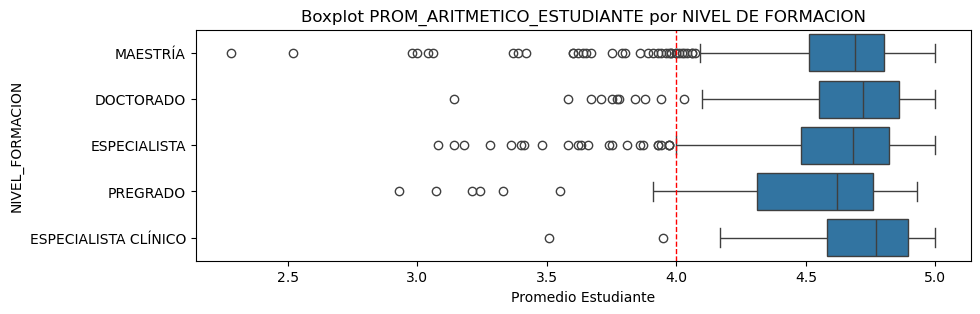

In [130]:
# BOXPLOR POT NIVEL DE FORMACION

plt.figure(figsize=(10,3))
sns.boxplot(
    data=df_sin_negativos,
    x="PROM_ARITMETICO_ESTUDIANTE",
    y="NIVEL_FORMACION"
)
# Línea vertical en 4
plt.axvline(4, color="red", linestyle="--", linewidth=1)
plt.title("Boxplot PROM_ARITMETICO_ESTUDIANTE por NIVEL DE FORMACION")
plt.xlabel("Promedio Estudiante")
plt.ylabel("NIVEL_FORMACION");

- Pregrado el único nivel donde el "bigote" cruza  la línea roja. Esto significa que una parte importante del 25% de docentes está calificado por debajo de 4. 

- Aunque la mayoría de maestría tiene notas muy altas, presenta una cantidad enorme de valores atípicos hacia la izquierda. Hay muchos casos individuales de maestría rindiendo muy por debajo de lo esperado caso similar a especialización. 

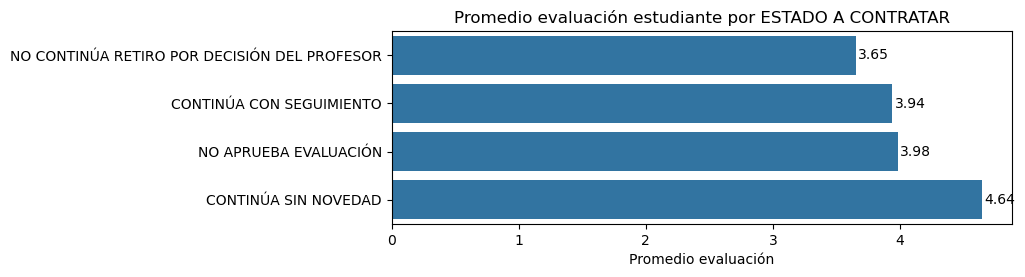

In [112]:
# ANÁLISIS POR ESTADO_A_CONTRATAR

prom_sede = df_sin_negativos.groupby("ESTADO_A_CONTRATAR")["PROM_ARITMETICO_ESTUDIANTE"].mean().sort_values()
plt.figure(figsize=(8,2.5))
sns.barplot(x=prom_sede.values, y=prom_sede.index)
plt.title("Promedio evaluación estudiante por ESTADO A CONTRATAR")
plt.xlabel("Promedio evaluación")
plt.ylabel("")
# ➜ Etiquetas al final de cada barra
for i, v in enumerate(prom_sede.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center");

El promedio de aquellos que continuan con seguimiento está por debajo 0.04 puntos de aquellos que no aprobaron la evaluación

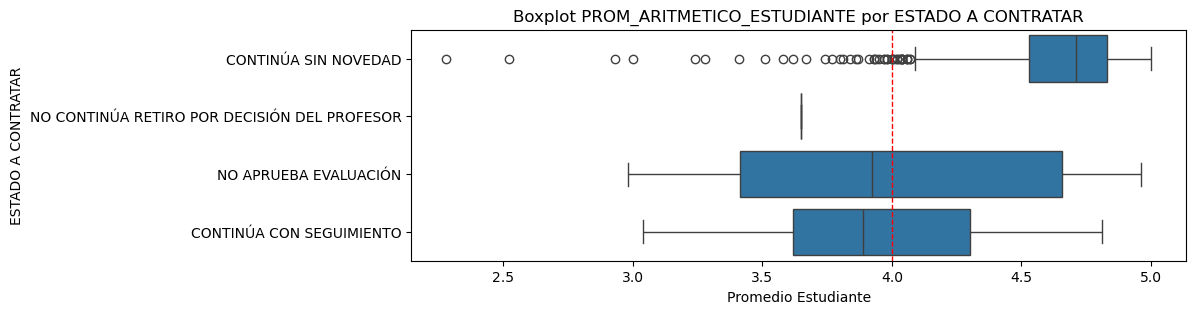

In [133]:
# BOXPLOT POR ESTADO A CONTRATAR

plt.figure(figsize=(10,3))
sns.boxplot(
    data=df_sin_negativos,
    x="PROM_ARITMETICO_ESTUDIANTE",
    y="ESTADO_A_CONTRATAR"
)
# Línea vertical en 4
plt.axvline(4, color="red", linestyle="--", linewidth=1)
plt.title("Boxplot PROM_ARITMETICO_ESTUDIANTE por ESTADO A CONTRATAR")
plt.xlabel("Promedio Estudiante")
plt.ylabel("ESTADO A CONTRATAR");

- Las categorías "Continúa con Seguimiento" y "No Aprueba Evaluación" tienen su mediana por debajo de 4.

- En la categoría "Continúa con Seguimiento", más del 50% de los casos están por debajo de 4.0. Es el grupo con el desempeño general más bajo.

- Aunque la gran mayoría de docentes quienes "Continúan Sin Novedad" están muy por encima de la línea roja, hay una cantidad de valores atípicos que bajan hasta 2.2. Esto significa que hay docentes con pésimas calificaciones de estudiantes. 

In [219]:
largo = len(df_sin_novedad)
df_sin_novedad = df_sin_negativos[df_sin_negativos["ESTADO_A_CONTRATAR"] == "CONTINÚA SIN NOVEDAD"]
conteo_menor4 = (df_sin_novedad["PROM_ARITMETICO_ESTUDIANTE"] < 4).sum()
porcentaje_menor4 = ((df_sin_novedad["PROM_ARITMETICO_ESTUDIANTE"] < 4).mean() * 100).round(2)
print(f"Del total de docentes que continuan sin novedad: {largo}, hay {conteo_menor4} docentes con nota menor a 4 un {porcentaje_menor4}% del total, el mínimo de nota es {df_sin_novedad["PROM_ARITMETICO_ESTUDIANTE"].min()} a 3.9")

Del total de docentes que continuan sin novedad: 1263, hay 27 docentes con nota menor a 4 un 2.14% del total, el mínimo de nota es 2.28 a 3.9


## ANÁLISIS DOCENTES QUE NO APROBARON EVALUACIÓN Y QUE CONTINUAN PERO CON SEGUIMIENTO

In [142]:
# FILTRAR DOCENTES CRÍTICOS

df_criticos = df_sin_negativos[df_sin_negativos["ESTADO_A_CONTRATAR"].isin(["NO APRUEBA EVALUACIÓN","CONTINÚA CON SEGUIMIENTO"])]
df_criticos.head(3)

,CODIGO,NOMBRE,SEDE,PROGRAMA,NIVEL_FORMACION,ESTADO_A_CONTRATAR,ESTUDIANTES_MATRICULADOS,ESTUDAINTES_PARTICIPACION,PROM_ARITMETICO_ESTUDIANTE,PROM_PONDERADO_ESTUDIANTE,PROM_AUTO_EVAL,OBSERVACION
1288,102318,JUAN SEBASTIAN ALEJANDRO PERILLA GRANADOS,BOGOTÁ - FEDERMÁN,MAESTRIA EN DERECHO DE FAMILIA,DOCTORADO,NO APRUEBA EVALUACIÓN,12,9,4.96,4.88,5.0,"CONCEPTO FACULTAD,"
1289,102336,PAOLA XIOMARA BRIÑEZ GALLEGO,BOGOTÁ - CIRCUNVALAR,MEDICINA VETERINARIA (PRES),DOCTORADO,CONTINÚA CON SEGUIMIENTO,92,44,3.78,4.20,4.9,"Recomendación Capacitación en:METODOLOGÍA,"
1290,102574,JUAN PABLO ANDRADE VALENCIA,POPAYÁN - ALTO CAUCA,MEDICINA VETERINARIA (PRES),ESPECIALISTA,CONTINÚA CON SEGUIMIENTO,87,71,4.30,4.16,5.0,"BIOMÉTRICO,"


In [141]:
print(f"Los docentes que no pasaron la evaluación y que continuan bajo seguimiento son {len(df_criticos)} el {docentes_foco}% del total")

Los docentes que no pasaron la evaluación y que continuan bajo seguimiento son 69 el 5.16% del total


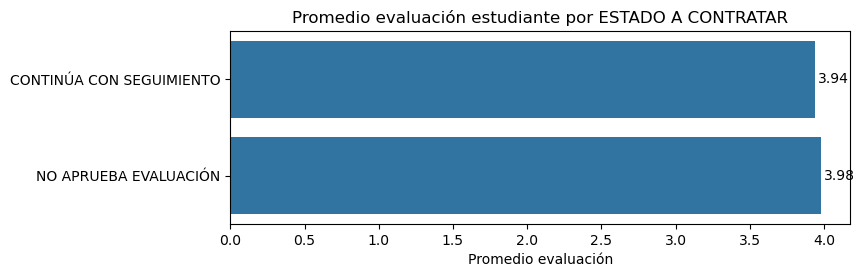

In [143]:
# ANÁLISIS POR ESTADO_A_CONTRATAR

prom_sede = df_criticos.groupby("ESTADO_A_CONTRATAR")["PROM_ARITMETICO_ESTUDIANTE"].mean().sort_values()
plt.figure(figsize=(8,2.5))
sns.barplot(x=prom_sede.values, y=prom_sede.index)
plt.title("Promedio evaluación estudiante por ESTADO A CONTRATAR")
plt.xlabel("Promedio evaluación")
plt.ylabel("")
# ➜ Etiquetas al final de cada barra
for i, v in enumerate(prom_sede.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center");

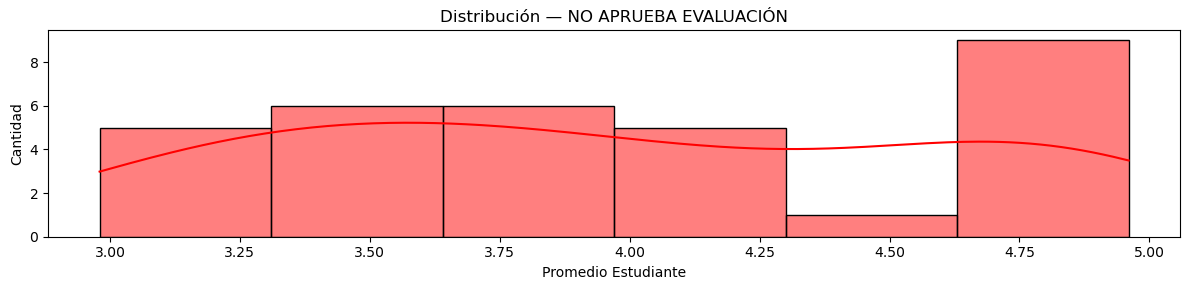

In [145]:
# GRÁFICOS DE DISTRIBUCIÓN PROMEDIO DE LOS QUE NO APROBARON 

df_no_aprueba = df_sin_negativos[
    df_sin_negativos["ESTADO_A_CONTRATAR"] == "NO APRUEBA EVALUACIÓN"
]

plt.figure(figsize=(12,3))
sns.histplot(df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"], kde=True, color="red")
plt.title("Distribución — NO APRUEBA EVALUACIÓN")
plt.xlabel("Promedio Estudiante")
plt.ylabel("Cantidad")
plt.tight_layout();

In [221]:
total = len(df_no_aprueba)
mayor4 = (df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"] > 4).sum()
menor4 = (df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"] < 4).sum()
porcentaje_mayor4 = ((df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"] > 4).mean() * 100).round(2)
porcentaje_menor4 = 100 - porcentaje_mayor4
print(f"Del total de docentes que no pasaron la evaluacion: {total}, el {porcentaje_mayor4}% tiene nota mayor a 4, {mayor4} docentes, siendo la nota máxima de {df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"].max()}. Mientras que el {porcentaje_menor4}% tienen una nota menor a 4, unos {menor4}. Desde una nota de {df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"].min()}")

Del total de docentes que no pasaron la evaluacion: 32, el 43.75% tiene nota mayor a 4, 14 docentes, siendo la nota máxima de 4.96. Mientras que el 56.25% tienen una nota menor a 4, unos 18. Desde una nota de 2.98


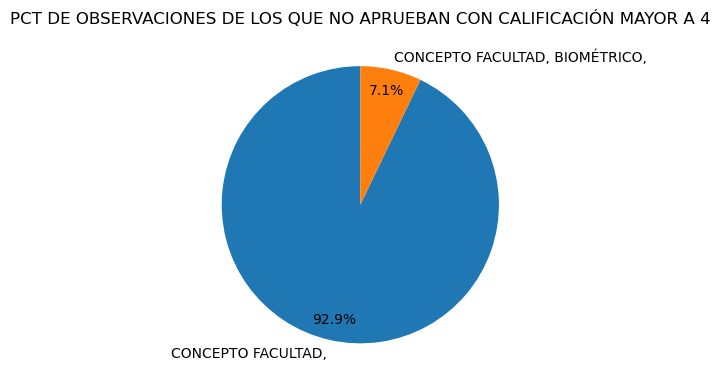

In [250]:
# RAZONES POR LAS CUALES NO CONTINUARON LOS DOCENTES NOTA MAYOR A 4

mayor_a_4 = df_no_aprueba[(df_no_aprueba["PROM_ARITMETICO_ESTUDIANTE"] > 4)]
prop_sede_no_aprueban = (mayor_a_4["OBSERVACION"].value_counts(normalize=True).mul(100).round(2))
plt.figure(figsize=(4.5,4.5))
prop_sede_no_aprueban.plot(kind="pie",autopct="%1.1f%%", startangle=90, pctdistance=0.85,labeldistance=1.1)
plt.title("PCT DE OBSERVACIONES DE LOS QUE NO APRUEBAN CON CALIFICACIÓN MAYOR A 4")
plt.ylabel("");

In [191]:
# VARIABLES MULTIPLES POR NO APRUEBA LA EVALUACION

# PROPORCIONES
prop_sede_no_aprueban = (df_no_aprueba["SEDE"].value_counts(normalize=True).mul(100).round(2))
prop_programa_no_aprueban = (df_no_aprueba["PROGRAMA"].value_counts(normalize=True).mul(100).round(2))
prop_nivel_no_aprueban = (df_no_aprueba["NIVEL_FORMACION"].value_counts(normalize=True).mul(100).round(2))
# PROMEDIOS
prom_sede_no_aprueban = df_no_aprueba.groupby("SEDE")["PROM_ARITMETICO_ESTUDIANTE"].mean().round(2).sort_values(ascending = False)
prom_programa_no_aprueban = df_no_aprueba.groupby("PROGRAMA")["PROM_ARITMETICO_ESTUDIANTE"].mean().round(2).sort_values(ascending = False)
prom_nivel_no_aprueban = df_no_aprueba.groupby("NIVEL_FORMACION")["PROM_ARITMETICO_ESTUDIANTE"].mean().round(2).sort_values(ascending = False)

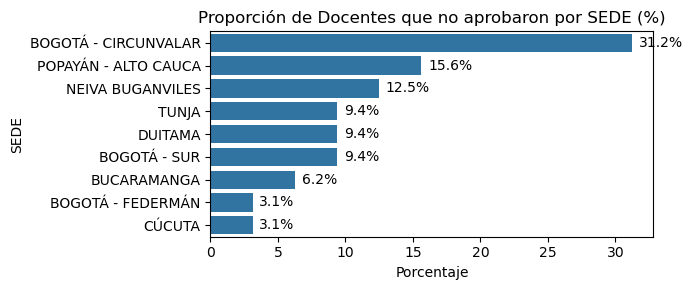

In [183]:
# PROPORCION DE DOCENTES QUE NO APROBARON POR SEDE

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prop_sede_no_aprueban.values, y=prop_sede_no_aprueban.index)
plt.title("Proporción de Docentes que no aprobaron por SEDE (%)")
plt.xlabel("Porcentaje")
plt.ylabel("SEDE")
for i, v in enumerate(prop_sede_no_aprueban.values):
    ax.text(
        v + 0.5,                # posición horizontal (un poco a la derecha de la barra)
        i,                      # posición vertical (la barra)
        f"{v:.1f}%",            # etiqueta formateada
        va='center'
    )
plt.tight_layout();

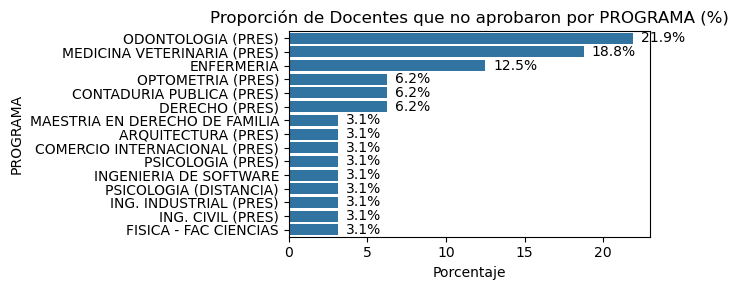

In [187]:
# PROPORCION DE DOCENTES QUE NO APROBARON POR NIVEL DE FORMACIÓN

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prop_programa_no_aprueban.values, y=prop_programa_no_aprueban.index)
plt.title("Proporción de Docentes que no aprobaron por PROGRAMA (%)")
plt.xlabel("Porcentaje")
plt.ylabel("PROGRAMA")
for i, v in enumerate(prop_programa_no_aprueban.values):
    ax.text(
        v + 0.5,                # posición horizontal (un poco a la derecha de la barra)
        i,                      # posición vertical (la barra)
        f"{v:.1f}%",            # etiqueta formateada
        va='center'
    )
plt.tight_layout();

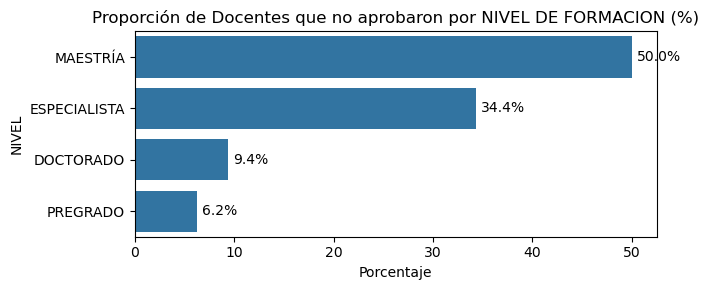

In [186]:
# PROPORCION DE DOCENTES QUE NO APROBARON POR NIVEL DE FORMACION

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prop_nivel_no_aprueban.values, y=prop_nivel_no_aprueban.index)
plt.title("Proporción de Docentes que no aprobaron por NIVEL DE FORMACION (%)")
plt.xlabel("Porcentaje")
plt.ylabel("NIVEL")
for i, v in enumerate(prop_nivel_no_aprueban.values):
    ax.text(
        v + 0.5,                # posición horizontal (un poco a la derecha de la barra)
        i,                      # posición vertical (la barra)
        f"{v:.1f}%",            # etiqueta formateada
        va='center'
    )
plt.tight_layout();

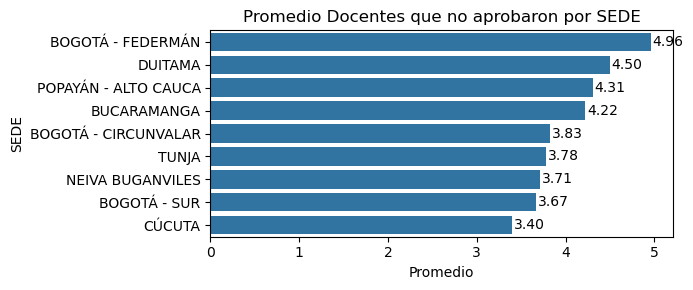

In [196]:
# PROMEDIO POR SEDE PROFESORES QUE NO APROBARON 

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prom_sede_no_aprueban.values,y=prom_sede_no_aprueban.index)
plt.title("Promedio Docentes que no aprobaron por SEDE")
plt.xlabel("Promedio")
plt.ylabel("SEDE")

# --- ETIQUETAS DE VALOR ---
for i, v in enumerate(prom_sede_no_aprueban.values):
    ax.text(v + 0.02, i,f"{v:.2f}",va='center')
plt.tight_layout();

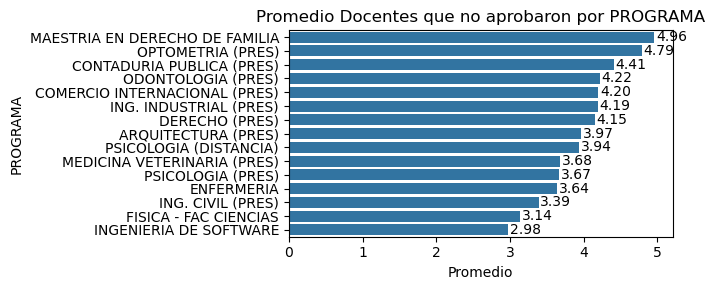

In [198]:
# PROMEDIO POR PROGRAMA PROFESORES QUE NO APROBARON 

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prom_programa_no_aprueban.values,y=prom_programa_no_aprueban.index)
plt.title("Promedio Docentes que no aprobaron por PROGRAMA")
plt.xlabel("Promedio")
plt.ylabel("PROGRAMA")

# --- ETIQUETAS DE VALOR ---
for i, v in enumerate(prom_programa_no_aprueban.values):
    ax.text(v + 0.02, i,f"{v:.2f}",va='center')
plt.tight_layout();

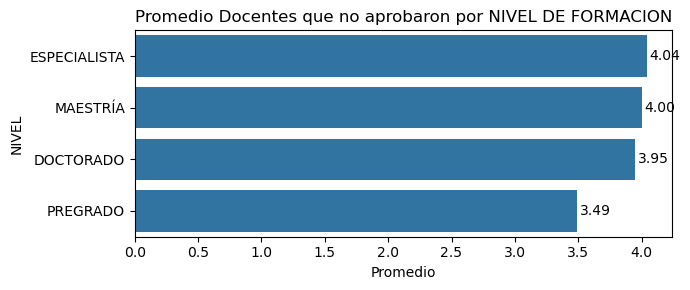

In [199]:
# PROMEDIO POR NIVEL DE FORMACION DE PROFESORES QUE NO APROBARON 

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prom_nivel_no_aprueban.values,y=prom_nivel_no_aprueban.index)
plt.title("Promedio Docentes que no aprobaron por NIVEL DE FORMACION")
plt.xlabel("Promedio")
plt.ylabel("NIVEL")

# --- ETIQUETAS DE VALOR ---
for i, v in enumerate(prom_nivel_no_aprueban.values):
    ax.text(v + 0.02, i,f"{v:.2f}",va='center')
plt.tight_layout();

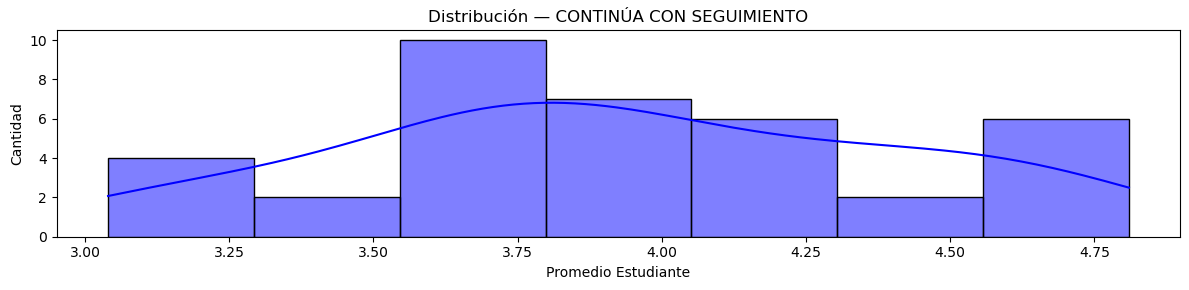

In [146]:
# GRÁFICOS DE DISTRIBUCIÓN PROMEDIO DE LOS QUE CONTINUAN CON SEGUIMIENTO

df_seguimiento = df_sin_negativos[
    df_sin_negativos["ESTADO_A_CONTRATAR"] == "CONTINÚA CON SEGUIMIENTO"
]

plt.figure(figsize=(12,3))
sns.histplot(df_seguimiento["PROM_ARITMETICO_ESTUDIANTE"], kde=True, color="blue")
plt.title("Distribución — CONTINÚA CON SEGUIMIENTO")
plt.xlabel("Promedio Estudiante")
plt.ylabel("Cantidad")
plt.tight_layout()

In [224]:
total = len(df_seguimiento)
mayor4 = (df_seguimiento["PROM_ARITMETICO_ESTUDIANTE"] > 4).sum()
menor4 = (df_seguimiento["PROM_ARITMETICO_ESTUDIANTE"] < 4).sum()
porcentaje_mayor4 = ((df_seguimiento["PROM_ARITMETICO_ESTUDIANTE"] > 4).mean() * 100).round(2)
porcentaje_menor4 = 100 - porcentaje_mayor4
print(f"Del total de docentes en seguimiento: {total}, el {porcentaje_mayor4}% tiene nota mayor a 4, {mayor4} docentes, siendo la nota máxima {df_seguimiento["PROM_ARITMETICO_ESTUDIANTE"].max()}. Mientras que el {porcentaje_menor4}% tienen una nota menor a 4, {menor4} docentes, siendo la nota mínima {df_seguimiento["PROM_ARITMETICO_ESTUDIANTE"].min()}")

Del total de docentes en seguimiento: 37, el 37.84% tiene nota mayor a 4, 14 docentes, siendo la nota máxima 4.81. Mientras que el 62.16% tienen una nota menor a 4, 23 docentes, siendo la nota mínima 3.04


In [200]:
# VARIABLES MULTIPLES POR CONTINUA CON SEGUIMIENTO

# PROPORCIONES
prop_sede_seguimiento = (df_seguimiento["SEDE"].value_counts(normalize=True).mul(100).round(2))
prop_programa_seguimiento = (df_seguimiento["PROGRAMA"].value_counts(normalize=True).mul(100).round(2))
prop_nivel_seguimiento = (df_seguimiento["NIVEL_FORMACION"].value_counts(normalize=True).mul(100).round(2))
# PROMEDIOS
prom_sede_seguimiento = df_seguimiento.groupby("SEDE")["PROM_ARITMETICO_ESTUDIANTE"].mean().round(2).sort_values(ascending = False)
prom_programa_seguimiento = df_seguimiento.groupby("PROGRAMA")["PROM_ARITMETICO_ESTUDIANTE"].mean().round(2).sort_values(ascending = False)
prom_nivel_seguimiento = df_seguimiento.groupby("NIVEL_FORMACION")["PROM_ARITMETICO_ESTUDIANTE"].mean().round(2).sort_values(ascending = False)

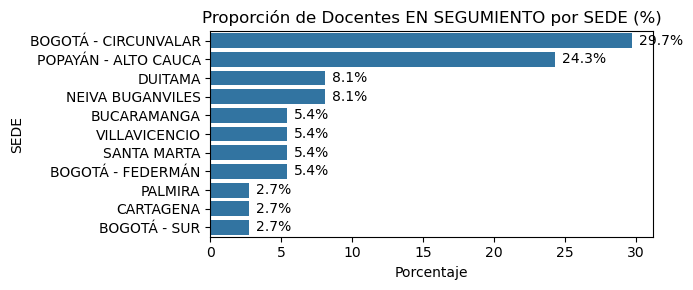

In [201]:
# PROPORCION DE DOCENTES QUE SEGUIMIENTO POR SEDE

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prop_sede_seguimiento.values, y=prop_sede_seguimiento.index)
plt.title("Proporción de Docentes EN SEGUMIENTO por SEDE (%)")
plt.xlabel("Porcentaje")
plt.ylabel("SEDE")
for i, v in enumerate(prop_sede_seguimiento.values):
    ax.text(
        v + 0.5,                # posición horizontal (un poco a la derecha de la barra)
        i,                      # posición vertical (la barra)
        f"{v:.1f}%",            # etiqueta formateada
        va='center'
    )
plt.tight_layout();

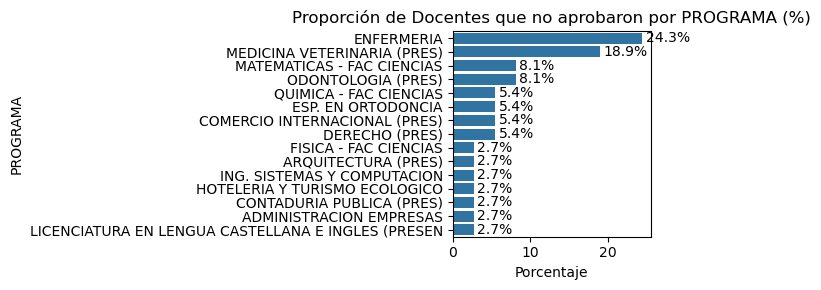

In [202]:
# PROPORCION DE DOCENTES EN SEGUIMIENTO POR PROGRAMA

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prop_programa_seguimiento.values, y=prop_programa_seguimiento.index)
plt.title("Proporción de Docentes que no aprobaron por PROGRAMA (%)")
plt.xlabel("Porcentaje")
plt.ylabel("PROGRAMA")
for i, v in enumerate(prop_programa_seguimiento.values):
    ax.text(
        v + 0.5,                # posición horizontal (un poco a la derecha de la barra)
        i,                      # posición vertical (la barra)
        f"{v:.1f}%",            # etiqueta formateada
        va='center'
    )
plt.tight_layout();

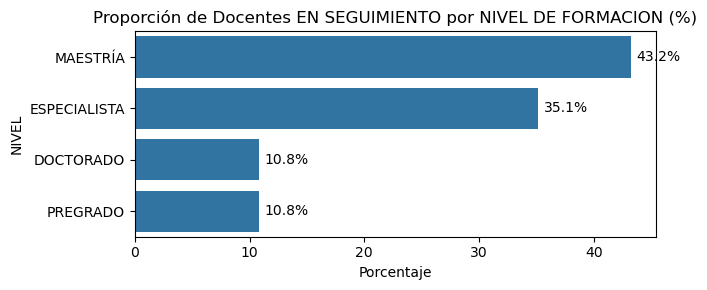

In [203]:
# PROPORCION DE DOCENTES EN SEGUIMIENTO POR NIVEL DE FORMACION

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prop_nivel_seguimiento.values, y=prop_nivel_seguimiento.index)
plt.title("Proporción de Docentes EN SEGUIMIENTO por NIVEL DE FORMACION (%)")
plt.xlabel("Porcentaje")
plt.ylabel("NIVEL")
for i, v in enumerate(prop_nivel_seguimiento.values):
    ax.text(
        v + 0.5,                # posición horizontal (un poco a la derecha de la barra)
        i,                      # posición vertical (la barra)
        f"{v:.1f}%",            # etiqueta formateada
        va='center'
    )
plt.tight_layout();

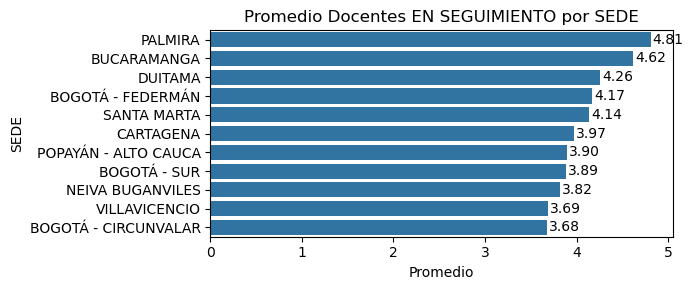

In [205]:
# PROMEDIO POR SEDE PROFESORES EN SEGUIMIENTO

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prom_sede_seguimiento.values,y=prom_sede_seguimiento.index)
plt.title("Promedio Docentes EN SEGUIMIENTO por SEDE")
plt.xlabel("Promedio")
plt.ylabel("SEDE")

# --- ETIQUETAS DE VALOR ---
for i, v in enumerate(prom_sede_seguimiento.values):
    ax.text(v + 0.02, i,f"{v:.2f}",va='center')
plt.tight_layout();

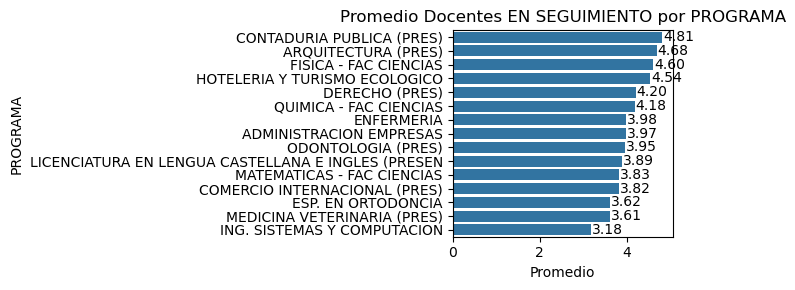

In [207]:
# PROMEDIO POR PROGRAMA PROFESORES EN SEGUIMIENTO

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prom_programa_seguimiento.values,y=prom_programa_seguimiento.index)
plt.title("Promedio Docentes EN SEGUIMIENTO por PROGRAMA")
plt.xlabel("Promedio")
plt.ylabel("PROGRAMA")

# --- ETIQUETAS DE VALOR ---
for i, v in enumerate(prom_programa_seguimiento.values):
    ax.text(v + 0.02, i,f"{v:.2f}",va='center')
plt.tight_layout();

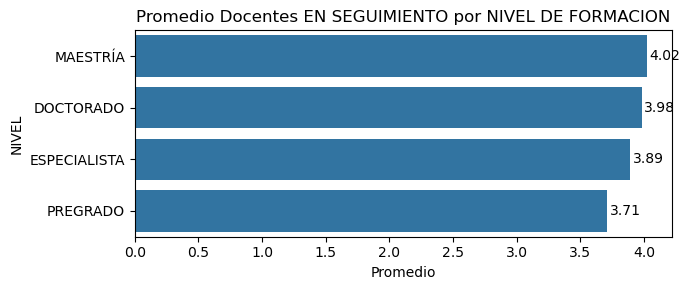

In [209]:
# PROMEDIO POR NIVEL PROFESORES EN SEGUIMIENTO

plt.figure(figsize=(7,3))
ax = sns.barplot(x=prom_nivel_seguimiento.values,y=prom_nivel_seguimiento.index)
plt.title("Promedio Docentes EN SEGUIMIENTO por NIVEL DE FORMACION")
plt.xlabel("Promedio")
plt.ylabel("NIVEL")

# --- ETIQUETAS DE VALOR ---
for i, v in enumerate(prom_nivel_seguimiento.values):
    ax.text(v + 0.02, i,f"{v:.2f}",va='center')
plt.tight_layout();

### AHORA CON ANÁLISIS DE SENTIMIENTOS

In [304]:
# CARGAR TABLA DE ANÁLISIS COMPLETO + SENTIMIENTOS

ruta_2 = r"C:\Users\9 ----- SIG\Documents\EVALUACION DOCENTE\RESUMEN IA\resumen_docente_IA_completo.xlsx"
df_completo = pd.read_excel(ruta_2)
df_completo.head(1)

,ID_DOCENTE,DOCENTE,NOTA_FINAL,PROM_COMENTARIO,AUTOEVALUA,HETE_SIN_ANALISIS,DIFERENCIA,DESVIACION,QUARTIL,COMENTARIOS_ANALIZADOS,%_POSITIVO,%_NEGATIVO,%_NEUTRO,RESUMEN_POSITIVO,RESUMEN_NEGATIVO,RESUMEN_NEUTRO
0,402917.0,ADIELA ZAPATA,4.85,4.925217,4.8,4.837321,0.007775,0.4,Q4,23,97.32,1.45,1.23,Excelente docente con actividades interactivas...,Ninguno de los comentarios es negativo.,"Profesor comprometido, pero sin detalles espec..."


In [305]:
# CRUCE DE FOCOS CON ANÁLISIS DE SENTIMIENTOS

columnas_cruce = ["ID_DOCENTE", "PROM_COMENTARIO", "COMENTARIOS_ANALIZADOS", 
                  "%_POSITIVO","%_NEGATIVO","%_NEUTRO","RESUMEN_POSITIVO",
                  "RESUMEN_NEGATIVO","RESUMEN_NEUTRO"]

df_unido = df_criticos.merge(df_completo[columnas_cruce], left_on="CODIGO", right_on="ID_DOCENTE", how="left")
df_unido.head(1)

,CODIGO,NOMBRE,SEDE,PROGRAMA,NIVEL_FORMACION,ESTADO_A_CONTRATAR,ESTUDIANTES_MATRICULADOS,ESTUDAINTES_PARTICIPACION,PROM_ARITMETICO_ESTUDIANTE,PROM_PONDERADO_ESTUDIANTE,...,OBSERVACION,ID_DOCENTE,PROM_COMENTARIO,COMENTARIOS_ANALIZADOS,%_POSITIVO,%_NEGATIVO,%_NEUTRO,RESUMEN_POSITIVO,RESUMEN_NEGATIVO,RESUMEN_NEUTRO
0,102318,JUAN SEBASTIAN ALEJANDRO PERILLA GRANADOS,BOGOTÁ - FEDERMÁN,MAESTRIA EN DERECHO DE FAMILIA,DOCTORADO,NO APRUEBA EVALUACIÓN,12,9,4.96,4.88,...,"CONCEPTO FACULTAD,",102318.0,4.958333,6.0,98.35,0.82,0.82,Excelente orientación y metodología,Sin comentarios específicos negativos,Los temas abordados son excelentes


In [306]:
# RECORTAR COLUMNAS 
columnas_queda = ["CODIGO", "NOMBRE", "ESTADO_A_CONTRATAR", "PROM_ARITMETICO_ESTUDIANTE", "PROM_COMENTARIO", "COMENTARIOS_ANALIZADOS","%_POSITIVO",
                 "%_NEGATIVO", "%_NEUTRO", "RESUMEN_POSITIVO", "RESUMEN_NEGATIVO", "RESUMEN_NEUTRO"]
df_unido = df_unido[columnas_queda]
df_unido.head(1)

,CODIGO,NOMBRE,ESTADO_A_CONTRATAR,PROM_ARITMETICO_ESTUDIANTE,PROM_COMENTARIO,COMENTARIOS_ANALIZADOS,%_POSITIVO,%_NEGATIVO,%_NEUTRO,RESUMEN_POSITIVO,RESUMEN_NEGATIVO,RESUMEN_NEUTRO
0,102318,JUAN SEBASTIAN ALEJANDRO PERILLA GRANADOS,NO APRUEBA EVALUACIÓN,4.96,4.958333,6.0,98.35,0.82,0.82,Excelente orientación y metodología,Sin comentarios específicos negativos,Los temas abordados son excelentes


In [307]:
# CRUCE PROMEDIO VS RPOMEDIO SENTIMIENTOS

df_unido["BUEN_PROM"] = df_unido["PROM_ARITMETICO_ESTUDIANTE"] >= 4
df_unido["BUEN_COMENT"] = df_unido["PROM_COMENTARIO"] >= 4
def clasificar(row):
    if row["BUEN_PROM"] and row["BUEN_COMENT"]:
        return "Buen promedio y buenos comentarios"
    elif row["BUEN_PROM"] and not row["BUEN_COMENT"]:
        return "Buen promedio pero malos comentarios"
    elif not row["BUEN_PROM"] and row["BUEN_COMENT"]:
        return "Mal promedio pero buenos comentarios"
    else:
        return "Mal promedio y malos comentarios"

df_unido["CATEGORIA_FINAL"] = df_unido.apply(clasificar, axis=1)
df_unido["CATEGORIA_FINAL"] = df_unido["CATEGORIA_FINAL"].str.upper()

conteo_cruce = df_unido["CATEGORIA_FINAL"].value_counts()
conteo_cruce_pct = round(conteo_cruce / sum(conteo_cruce) * 100,2) 
resumen = pd.DataFrame({ "CATEGORIA": conteo_cruce.index,"CANTIDAD": conteo_cruce.values,"PORCENTAJE": conteo_cruce_pct.values})
resumen

,CATEGORIA,CANTIDAD,PORCENTAJE
0,MAL PROMEDIO Y MALOS COMENTARIOS,39,56.52
1,BUEN PROMEDIO PERO MALOS COMENTARIOS,15,21.74
2,BUEN PROMEDIO Y BUENOS COMENTARIOS,13,18.84
3,MAL PROMEDIO PERO BUENOS COMENTARIOS,2,2.90


El 79% de los docentes que no pasaron la evaluación y que continuan con seguimiento presentan promedio de evaluación de comentarios de estudiantes menor a 4. El 19% presenta tanto promedio superior a 4 y comentarios de estudiantes superior a 4.

In [308]:
# CALCULO EXTRA

buenos_buenos = df_unido[df_unido["CATEGORIA_FINAL"] == "BUEN PROMEDIO Y BUENOS COMENTARIOS"]
porcentaje_no_aprueban = round(((buenos_buenos["ESTADO_A_CONTRATAR"] == "NO APRUEBA EVALUACIÓN").mean() * 100),2)
print(f"De los {len(buenos_buenos)} docentes que tienen promedio superior 4 en evaluación y en comentarios. Al menos el {porcentaje_no_aprueban}% están en la categoría de 'NO APRUEBAN LA EVALUACIÓN', unos 9 docentes de 13")

De los 13 docentes que tienen promedio superior 4 en evaluación y en comentarios. Al menos el 69.23% están en la categoría de 'NO APRUEBAN LA EVALUACIÓN', unos 9 docentes de 13


La siguiente tabla mostrará el resunmen de todos los docentes foco frente al análisis de sentimientos, aspectos negativos, positivos y neutrales

In [310]:
# RESUMEN DE ANÁLISIS DE SENTIMIENTOS

categorias = ["CODIGO","NOMBRE","PROM_ARITMETICO_ESTUDIANTE","%_POSITIVO","%_NEGATIVO",
              "%_NEUTRO","RESUMEN_POSITIVO","RESUMEN_NEGATIVO","RESUMEN_NEUTRO"]
df_unido = df_unido[categorias]
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)
df_unido

,CODIGO,NOMBRE,PROM_ARITMETICO_ESTUDIANTE,%_POSITIVO,%_NEGATIVO,%_NEUTRO,RESUMEN_POSITIVO,RESUMEN_NEGATIVO,RESUMEN_NEUTRO
0,102318,JUAN SEBASTIAN ALEJANDRO PERILLA GRANADOS,4.96,98.35,0.82,0.82,Excelente orientación y metodología,Sin comentarios específicos negativos,Los temas abordados son excelentes
1,102336,PAOLA XIOMARA BRIÑEZ GALLEGO,3.78,42.23,31.50,26.27,Es una excelente docente con múltiples sugerencias de mejora.,Falta dominio sobre los temas y falta dinámica en clase.,"Se esfuerza para que sus estudiantes entiendan, tiene un carácter fuerte pero comprensiva."
2,102574,JUAN PABLO ANDRADE VALENCIA,4.30,45.74,39.83,14.41,Explica de manera clara y presenta buen dominio del tema,"No asiste a clases ni dicta, cancelando las que sí se dan",Mantiene un buen manejo de temas y prácticas en clase
3,102680,DANIEL ORLANDO MONGUI ROJAS,4.60,45.20,37.25,17.55,Excelente profesor y buen docente,"Método de enseñanza difícil de entender, actitudes poco pedagógicas",Puntuales pero llega tarde
4,102814,RUBÉN DARÍO RODRÍGUEZ ANGARITA,4.68,66.33,23.68,10.00,Excelente docente con dinámicas interactivas,Actitud negativa y falta de coherencia en el contenido,Audiencias neutrales sobre la enseñanza
5,102915,ROGER GRISALES DIAZ,4.19,22.42,52.63,24.93,Explica muy bien.,Método poco didáctico y clases aburridas,"Falta de organización, no hace tutorías."
6,102948,PABLO ANDRES BOLAÑOS CERTUCHE,4.78,80.05,11.20,8.75,Excelente profesor con habilidades únicas de enseñanza,"Docente desatendido en aulas virtuales, falta empatía y retroalimentación",Interesa el aprendizaje del estudiante más que la obtención de notas
7,102990,DIANA FERNANDA SANDOVAL CERON,3.62,26.46,51.25,22.28,"Explica con amor, retroalimenta bien pero notas al final","No entrega retroalimentación, califica injustamente","Buen conocimiento, explica teóricamente bien"
8,103025,JOHN STEBAN POLINDARA IDROBO,4.93,87.98,5.33,6.70,Excelente en prácticas clínicas,Falta de respuesta inmediata a urgencias,Buen orientador pero sin preferencias
9,103053,CRISTIAN DAVID PUPIALES NARVAEZ,4.74,83.18,4.95,11.88,"Excelente docente, enseña con vocación y mucha dedicación.",Vuelvo y repito que debería tener más autoridad con los estudiantes.,"Es algo desorganizado y distraído, sin embargo es buen docente."


## ANÁLISIS DE SENTIMIENTOS PROFESORES QUE CONTINUAN SIN NOVEDAD CON PROMEDIO MENOR A 4

In [313]:
# CREAR MASCARA

df_sin_novedad_menor4 = df_sin_negativos[(df_sin_negativos["ESTADO_A_CONTRATAR"] == "CONTINÚA SIN NOVEDAD") 
&(df_sin_negativos["PROM_ARITMETICO_ESTUDIANTE"] < 4)]

In [316]:
# CRUCE DE PROMEDIOS

df_unido_2 = df_sin_novedad_menor4.merge(df_completo[columnas_cruce], left_on="CODIGO", right_on="ID_DOCENTE", how="left")
df_unido_2 = df_unido_2[columnas_queda]
df_unido_2["BUEN_PROM"] = df_unido_2["PROM_ARITMETICO_ESTUDIANTE"] >= 4
df_unido_2["BUEN_COMENT"] = df_unido_2["PROM_COMENTARIO"] >= 4
df_unido_2["CATEGORIA_FINAL"] = df_unido_2.apply(clasificar, axis=1)
df_unido_2["CATEGORIA_FINAL"] = df_unido_2["CATEGORIA_FINAL"].str.upper()

conteo_cruce = df_unido_2["CATEGORIA_FINAL"].value_counts()
conteo_cruce_pct = round(conteo_cruce / sum(conteo_cruce) * 100,2) 
resumen = pd.DataFrame({ "CATEGORIA": conteo_cruce.index,"CANTIDAD": conteo_cruce.values,"PORCENTAJE": conteo_cruce_pct.values})
resumen

,CATEGORIA,CANTIDAD,PORCENTAJE
0,MAL PROMEDIO Y MALOS COMENTARIOS,26,96.3
1,MAL PROMEDIO PERO BUENOS COMENTARIOS,1,3.7


De los profesores que continuan sin novedad con promedio menor a 4, el 96% tiene mal promedio de comentarios.

In [317]:
# RESUMEN DE ANÁLISIS DE SENTIMIENTOS

categorias = ["CODIGO","NOMBRE","PROM_ARITMETICO_ESTUDIANTE","%_POSITIVO","%_NEGATIVO",
              "%_NEUTRO","RESUMEN_POSITIVO","RESUMEN_NEGATIVO","RESUMEN_NEUTRO"]
df_unido_2 = df_unido_2[categorias]
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)
df_unido_2

,CODIGO,NOMBRE,PROM_ARITMETICO_ESTUDIANTE,%_POSITIVO,%_NEGATIVO,%_NEUTRO,RESUMEN_POSITIVO,RESUMEN_NEGATIVO,RESUMEN_NEUTRO
0,102741,MIGUEL FERNANDO MOLANO CABREJO,3.80,32.97,41.60,25.43,Excelente manera de enseñar la temáticaExplicación confusa y difícil de entenderDificultades para aprobar la materia,0,0
1,501709,DANIEL ENRIQUE NARVÁEZ SILVA,3.98,1.00,89.35,9.65,Se nota la falta de dedicación en las clases.,Las clases son poco acompañadas y podrían ser alternativas a clases particulares.,La UAN necesita más profesores con experiencia.
2,306763,ZULMA JOHANNA MORENO HUERTAS,3.87,50.55,39.93,9.54,"Buena docente, tiene conocimiento y responde dudas en clase.",Es una excelente periodoncista pero actitud poco sociable,"Sabe mucho sobre su área, aunque actúa con cierta imparcialidad en las notas."
3,500089,CESAR SANABRIA MEDINA,3.94,73.05,22.66,4.31,"Excelente docente, dinámico y dedicado.",Falta de transparencia y colaboración en proyectos,Profesional pero con áreas de mejora en comunicación y comprensión.
4,500344,OSWALDO ALFONSO BORRAEZ GAONA,3.95,64.66,30.86,4.52,Excelente docente con mucha experiencia.,"Insólito y poco participativo en las clases, solo regañando a los estudiantes.",Experiencia destacada pero enseñanza limitada.
5,501885,ADRIANA MATILDE FLOREZ CABRERA,3.77,47.00,45.75,7.25,Excelente profesora.,"Calificación muy neutra, materia considerada menos relevante que otras disciplinas.",Materia de profundización tiene importancia pero no se percibe en calificaciones.
6,310344,SASHA VALENTINA GUTIERREZ PINEDA,3.93,49.25,35.65,15.13,Excelente docente paciente y explicativa,Demora en revisar pacientes causando retrasosNinguna información relevante sobre SASHA GUTIERREZ,0
7,401611,LILIAM PATRICIA SOTELO ROMERO,3.62,61.89,24.13,14.03,"Excelente docente, actitud motivadora y explicaciones claras.",No dictó clase este semestre ni acompañó en clínica,La doctora no está disponible para clases o clínicas.
8,403432,NATHALY JAZMIN SUTA ROMERO,3.41,25.63,57.78,16.58,Muy buen docente.,"La Dra. No me da clases, no puedo calificarla.",0
9,103074,MARIO ANDRES CUADROS PASTRANA,3.97,7.60,39.65,52.75,Expresa preocupación por pérdida de tiempo en clase.,Critica falta de claridad y mejora necesaria en métodos explicativos.,"Observa limitaciones en la enseñanza, pero reconoce algunas formas positivas de enseñar."


In [2]:
!jupyter nbconvert --to html --no-input --output solo_output.html Análisis_comité.ipynb

[NbConvertApp] Converting notebook Análisis_comité.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 29 image(s).
[NbConvertApp] Writing 2218457 bytes to solo_output.html
